#### Importing libraries and required data


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
ds = load_iris()
dir(ds)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
ds.data.shape

(150, 4)

In [4]:
ds.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
ds.target.shape

(150,)

In [6]:
ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Data Analysis

In [7]:
df = pd.DataFrame(np.c_[ds.data, ds.target], columns=ds.feature_names + ['target'])

In [8]:
df.target = df.target.astype(np.int64)    #conversion dtype from np.float64 to np.int64

In [9]:
df['target_names'] = df.target.apply(lambda x: ds.target_names[x])

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
X = df.drop(['target','target_names'],axis=1)
y = df.target

In [12]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

#### Exploratory data analysis




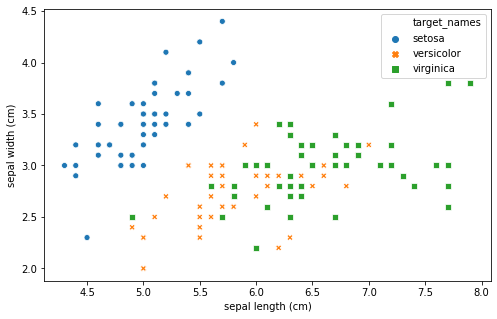

In [14]:
plt.figure(figsize=(8,5))
fig = sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['target_names'], style=df['target_names'])

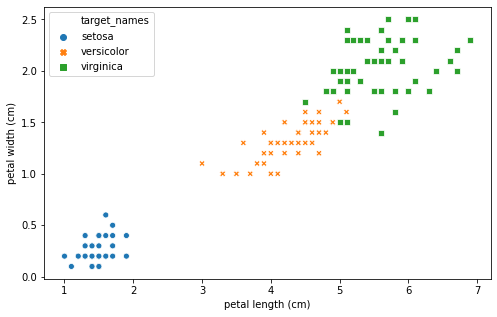

In [15]:
plt.figure(figsize=(8,5))
fig = sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df['target_names'], style=df['target_names'])

#### Training model

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
print(X_train.shape)
print(X_test.shape)

(100, 4)
(50, 4)


In [17]:
# Using Support vector machine 
from sklearn.svm import SVC
svm_model = SVC()

In [18]:
svm_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
svm_model.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2])

In [20]:
svm_model.score(X_test, y_test)*100 #acuracy in %

98.0

In [21]:
# Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [22]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
dt_model.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2])

In [24]:
dt_model.score(X_test, y_test)*100 #acuracy in %

98.0

In [25]:
# Using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='entropy',n_estimators=88)

In [26]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=88,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
rf_model.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2])

In [28]:
rf_model.score(X_test, y_test)*100 #acuracy in %

96.0